# Netflix TV Shows & Movies

## Import Libraries and Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
netflix = pd.read_csv('netflix_titles.csv', index_col='show_id')
netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
netflix.describe(include='all')

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,Movie,My Little Pony Equestria Girls: Rollercoaster ...,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [4]:
netflix.shape

(7787, 11)

In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, s1 to s7787
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   director      5398 non-null   object
 3   cast          7069 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   listed_in     7787 non-null   object
 10  description   7787 non-null   object
dtypes: int64(1), object(10)
memory usage: 730.0+ KB


In [6]:
netflix.type.unique()

array(['TV Show', 'Movie'], dtype=object)

In [7]:
netflix.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [8]:
netflix.duration.unique()[:5]

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min'], dtype=object)

In [9]:
netflix.listed_in.unique()[:5]

array(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas'], dtype=object)

In [10]:
netflix.country.unique()[:5]

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey'],
      dtype=object)

### Description
This dataset consists of 7,787 TV shows and movies available on Netflix, globally, with release years spanning from 1925-2021.  The columns are as follows:
- show_id: The unique identifier for the show/movie.  I used this as the index.
- type: Whether it is a TV show or a movie.
- title: The name of the show/movie.
- director: A list of directors of the show/movie.
- cast: A list of cast members in the show/movie.
- country: A list of the countries where the show/movie is available.
- date_added: The date the show/movie became available on Netflix.
- release_year: The year the show/movie was released.
- rating: The rating of the show/movie based on level of maturity of content and language.
- duration: The number of seasons the show lasted or the movie in minutes.
- listed_in: A list of the genres the show/movie belongs to.
- description: A text description of the show/movie.

### Possible Analyses with this Dataset
#### Overview
1. Change in number of shows/movies available over time.
2. Proportion of shows vs movies.
3. Number of directors, cast members, countries available, and genres.
4. Average lengths for movies and tenure for shows.
5. Most and least common countries, genres, ratings, directors, and cast members.

#### Deep Dive
6. Length of cast by country.
7. Proportion of shows vs movies by country.
8. Range of directors and cast members in terms of number of countries.
9. Deeper dive into movies separately.
10. Deeper dive into TV shows separately.
11. Deeper dive into specific regions (e.g. Africa).
12. Profiles with similar data, outliers across multiple categories, big budget vs small budget.

#### Natural Language Processing
13. Most common words in descriptions overall and by category (i.e. rating, genre).

#### Recommendation System
14. Recommendations based on similar shows.

## Analysis: Overview

### 1. Change in number of shows/movies available over time.

In [11]:
netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [12]:
sum(netflix.duplicated())

0

In [13]:
na_fill_cols = ['director', 'cast', 'country', 'rating']
for col in na_fill_cols:
    netflix[col].fillna('Unknown', inplace=True)

In [14]:
netflix['date_added'] = pd.to_datetime(netflix.date_added)
netflix['year_added'] = netflix.date_added.dt.year.astype('int', errors='ignore')

In [15]:
netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
show_id,,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0


In [16]:
new_content_by_year = netflix.pivot_table(index='year_added', aggfunc=np.count_nonzero).title
new_content_by_year

year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      25
2015.0      88
2016.0     443
2017.0    1225
2018.0    1685
2019.0    2153
2020.0    2009
2021.0     117
Name: title, dtype: int64

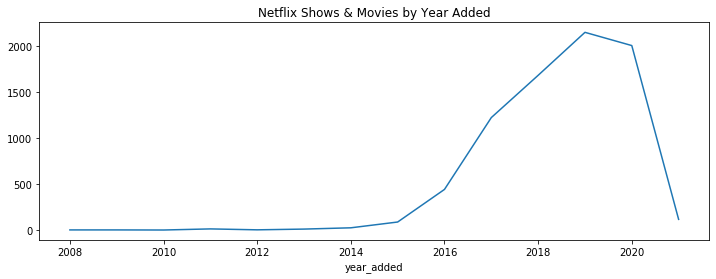

In [17]:
new_content_by_year.plot(figsize=(12,4), title='Netflix Shows & Movies by Year Added')

### 2. Proportion of shows vs movies.

In [18]:
netflix.type.value_counts(normalize=True) * 100

Movie      69.050982
TV Show    30.949018
Name: type, dtype: float64

### 3. Number of directors, cast members, countries available, and genres.

In [19]:
netflix.country.tail(3)

show_id
s7785                                  Unknown
s7786                                Australia
s7787    United Kingdom, Canada, United States
Name: country, dtype: object

In [20]:
def convert_to_list(text):
    if ',' not in text:
        return [text]
    else:
        converted_text = text.split(',')
        for x in converted_text:
            converted_text[converted_text.index(x)] = x.strip()
        return converted_text
    
# convert_to_list('Brazil')
convert_to_list('Brazil, Argentina, Peru')

['Brazil', 'Argentina', 'Peru']

In [21]:
list_columns = ['director', 'cast', 'country', 'listed_in']
for col in list_columns:
    netflix['{}_list'.format(col)] = netflix[col].apply(convert_to_list)

netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,director_list,cast_list,country_list,listed_in_list
show_id,,,,,,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,[Unknown],"[João Miguel, Bianca Comparato, Michel Gomes, ...",[Brazil],"[International TV Shows, TV Dramas, TV Sci-Fi ..."
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,[Jorge Michel Grau],"[Demián Bichir, Héctor Bonilla, Oscar Serrano,...",[Mexico],"[Dramas, International Movies]"
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,[Gilbert Chan],"[Tedd Chan, Stella Chung, Henley Hii, Lawrence...",[Singapore],"[Horror Movies, International Movies]"
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,[Shane Acker],"[Elijah Wood, John C. Reilly, Jennifer Connell...",[United States],"[Action & Adventure, Independent Movies, Sci-F..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,[Robert Luketic],"[Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",[United States],[Dramas]


In [22]:
new_list_columns = ['director_list', 'cast_list', 'country_list', 'listed_in_list']
for col in new_list_columns:
    netflix['{}_size'.format(col)] = netflix[col].apply(lambda x: len(x))
netflix.rename(columns={
    'director_list_size': 'director_size',
    'cast_list_size': 'cast_size',
    'country_list_size': 'country_size',
    'listed_in_list_size': 'listed_in_size'
}, inplace=True)
netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,director_list,cast_list,country_list,listed_in_list,director_size,cast_size,country_size,listed_in_size
show_id,,,,,,,,,,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,[Unknown],"[João Miguel, Bianca Comparato, Michel Gomes, ...",[Brazil],"[International TV Shows, TV Dramas, TV Sci-Fi ...",1,11,1,3
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,[Jorge Michel Grau],"[Demián Bichir, Héctor Bonilla, Oscar Serrano,...",[Mexico],"[Dramas, International Movies]",1,6,1,2
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,[Gilbert Chan],"[Tedd Chan, Stella Chung, Henley Hii, Lawrence...",[Singapore],"[Horror Movies, International Movies]",1,9,1,2
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,[Shane Acker],"[Elijah Wood, John C. Reilly, Jennifer Connell...",[United States],"[Action & Adventure, Independent Movies, Sci-F...",1,9,1,3
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,[Robert Luketic],"[Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",[United States],[Dramas],1,12,1,1


In [23]:
netflix.director_size.value_counts(normalize=True) * 100

1     92.898420
2      6.318223
3      0.410941
4      0.166945
5      0.064210
10     0.038526
11     0.025684
12     0.025684
7      0.012842
13     0.012842
9      0.012842
8      0.012842
Name: director_size, dtype: float64

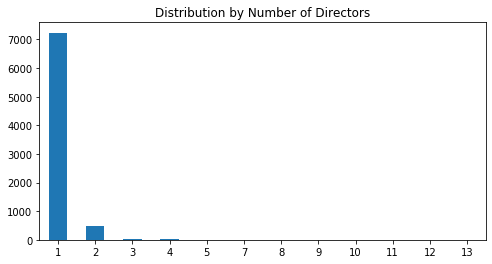

In [24]:
netflix.director_size.value_counts()[[1,2,3,4,5,7,8,9,10,11,12,13]].plot.bar(figsize=(8,4), rot=0, title='Distribution by Number of Directors')

In [25]:
netflix.cast_size.value_counts(normalize=True) * 100

1     19.853602
10    15.898292
8     13.586747
9      8.013356
6      7.435469
7      6.754848
11     5.136766
5      4.289200
12     3.236163
4      3.171953
2      2.375754
3      2.183126
13     2.003339
14     1.348401
15     1.348401
16     0.834725
17     0.462309
18     0.436625
20     0.295364
19     0.282522
21     0.141261
22     0.115577
24     0.089893
23     0.089893
25     0.089893
26     0.077051
28     0.077051
27     0.038526
47     0.038526
33     0.038526
34     0.038526
38     0.025684
40     0.025684
41     0.025684
39     0.025684
50     0.025684
30     0.025684
29     0.012842
44     0.012842
32     0.012842
31     0.012842
42     0.012842
Name: cast_size, dtype: float64

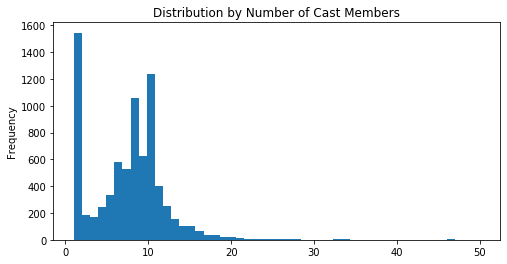

In [26]:
netflix.cast_size.plot.hist(figsize=(8,4), bins=50, title='Distribution by Number of Cast Members')

In [27]:
netflix.country_size.value_counts(normalize=True) * 100

1     85.193271
2      9.798382
3      3.082060
4      1.219982
5      0.423783
6      0.179787
7      0.064210
10     0.012842
12     0.012842
8      0.012842
Name: country_size, dtype: float64

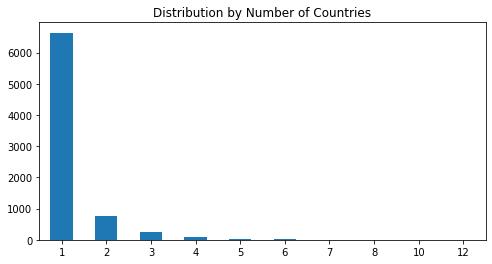

In [28]:
netflix.country_size.value_counts()[[1,2,3,4,5,6,7,8,10,12]].plot.bar(figsize=(8,4), rot=0, title='Distribution by Number of Countries')

In [29]:
netflix.listed_in_size.value_counts(normalize=True) * 100

3    42.352639
2    34.519070
1    23.128291
Name: listed_in_size, dtype: float64

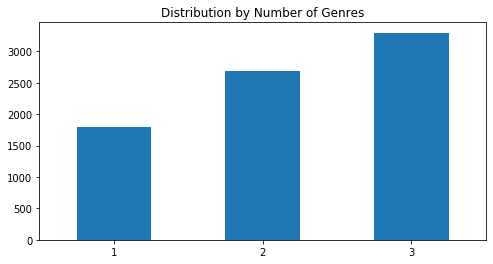

In [30]:
netflix.listed_in_size.value_counts()[[1,2,3]].plot.bar(figsize=(8,4), rot=0, title='Distribution by Number of Genres')

### 4. Average lengths for movies and tenure for shows.

In [31]:
netflix.duration.head()

show_id
s1    4 Seasons
s2       93 min
s3       78 min
s4       80 min
s5      123 min
Name: duration, dtype: object

In [32]:
tv_shows = netflix[netflix.type == 'TV Show'].copy()
movies = netflix[netflix.type == 'Movie'].copy()

In [33]:
season_dist = pd.DataFrame(tv_shows.duration.value_counts())
season_dist['duration_pct'] = season_dist.duration / season_dist.duration.sum() * 100
season_dist.rename(columns={'duration': 'freq', 'duration_pct': 'percent'}, inplace=True)
season_dist

,freq,percent
1 Season,1608,66.721992
2 Seasons,382,15.850622
3 Seasons,184,7.634855
4 Seasons,87,3.609959
5 Seasons,58,2.406639
6 Seasons,30,1.244813
7 Seasons,19,0.788382
8 Seasons,18,0.746888
9 Seasons,8,0.331950
10 Seasons,6,0.248963


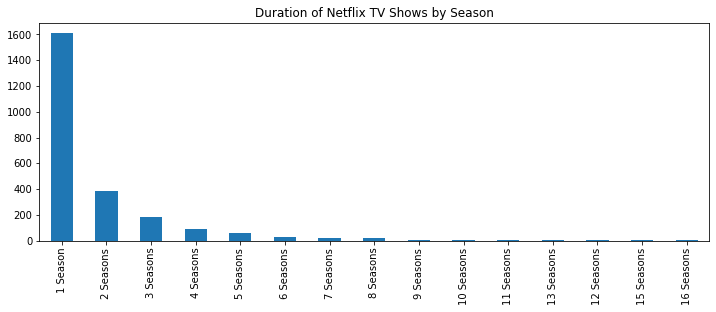

In [34]:
season_dist.freq.plot.bar(figsize=(12,4), title='Duration of Netflix TV Shows by Season')

In [35]:
movies['duration'] = movies.duration.str.replace(' min', '').astype('int')
movies.duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

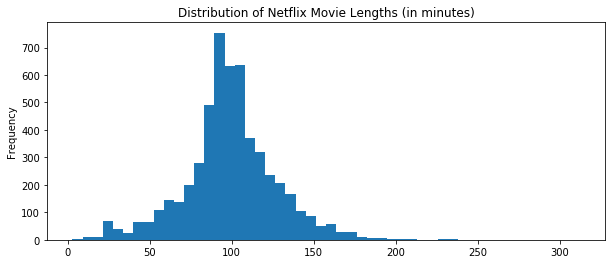

In [36]:
movies.duration.plot.hist(figsize=(10,4), bins=50, title='Distribution of Netflix Movie Lengths (in minutes)')

### 5. Most and least common countries, genres, ratings, directors, and cast members.

In [37]:
netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,director_list,cast_list,country_list,listed_in_list,director_size,cast_size,country_size,listed_in_size
show_id,,,,,,,,,,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,[Unknown],"[João Miguel, Bianca Comparato, Michel Gomes, ...",[Brazil],"[International TV Shows, TV Dramas, TV Sci-Fi ...",1,11,1,3
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,[Jorge Michel Grau],"[Demián Bichir, Héctor Bonilla, Oscar Serrano,...",[Mexico],"[Dramas, International Movies]",1,6,1,2
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,[Gilbert Chan],"[Tedd Chan, Stella Chung, Henley Hii, Lawrence...",[Singapore],"[Horror Movies, International Movies]",1,9,1,2
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,[Shane Acker],"[Elijah Wood, John C. Reilly, Jennifer Connell...",[United States],"[Action & Adventure, Independent Movies, Sci-F...",1,9,1,3
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,[Robert Luketic],"[Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",[United States],[Dramas],1,12,1,1


In [38]:
# Strategy
# 1 - create list of unique entries for each category (loop through series column)
# 2 - count # of times each unique entry appears (loop through list from step 1)

In [39]:
def plot_freq_dist(df, col, category, num=50, highest=True, drop_unknown=False):
    frequencies = {}
    for entry in list(df[col]):
        for x in entry:
            if x not in frequencies:
                frequencies[x] = 1
            else:
                frequencies[x] += 1
    
    freq_dist = pd.DataFrame(pd.Series(frequencies), columns=['freq'])
    freq_dist['percent'] = freq_dist.freq / freq_dist.freq.sum() * 100
    freq_dist.sort_values(by='freq', ascending=highest, inplace=True)
    
    if drop_unknown:
        freq_dist.drop(index='Unknown', inplace=True)
    
    freq_dist[-num:].freq.plot.barh(figsize=(12,len(freq_dist[-num:])*.25), title='{} Distribution on Netflix'.format(category.title()))

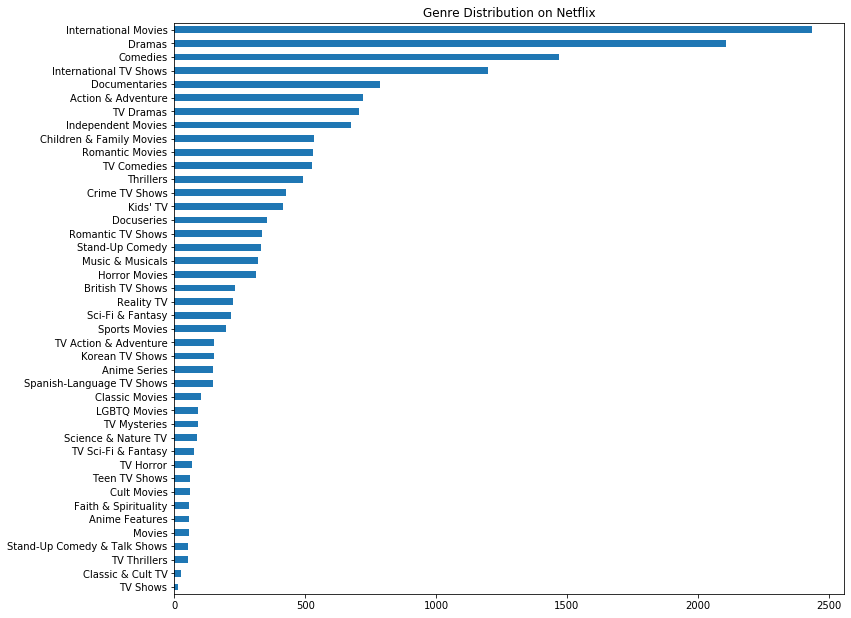

In [40]:
plot_freq_dist(netflix, 'listed_in_list', 'genre', 50)

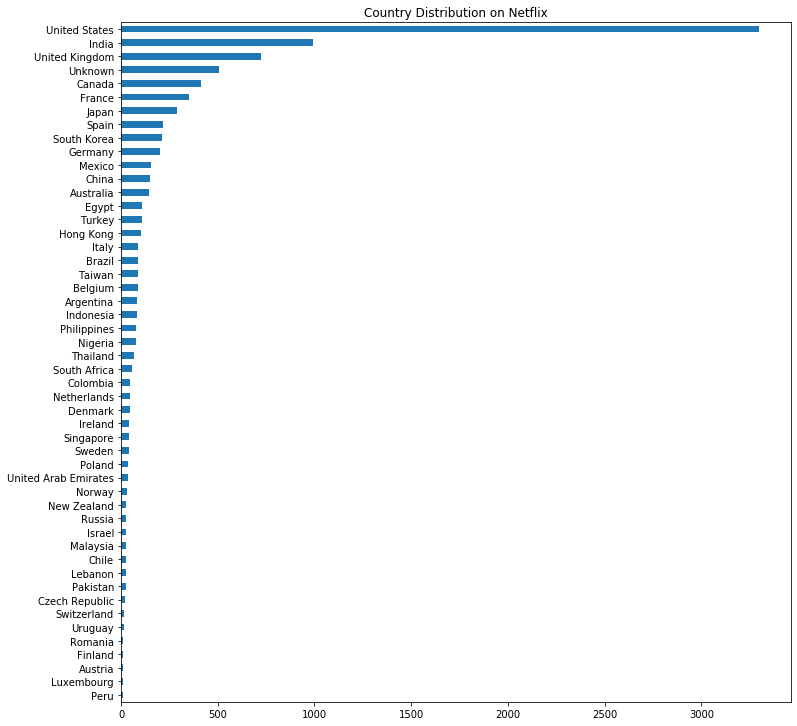

In [41]:
plot_freq_dist(netflix, 'country_list', 'country', 50)
# plot_freq_dist(netflix, 'country_list', 'country', 50, highest=False)

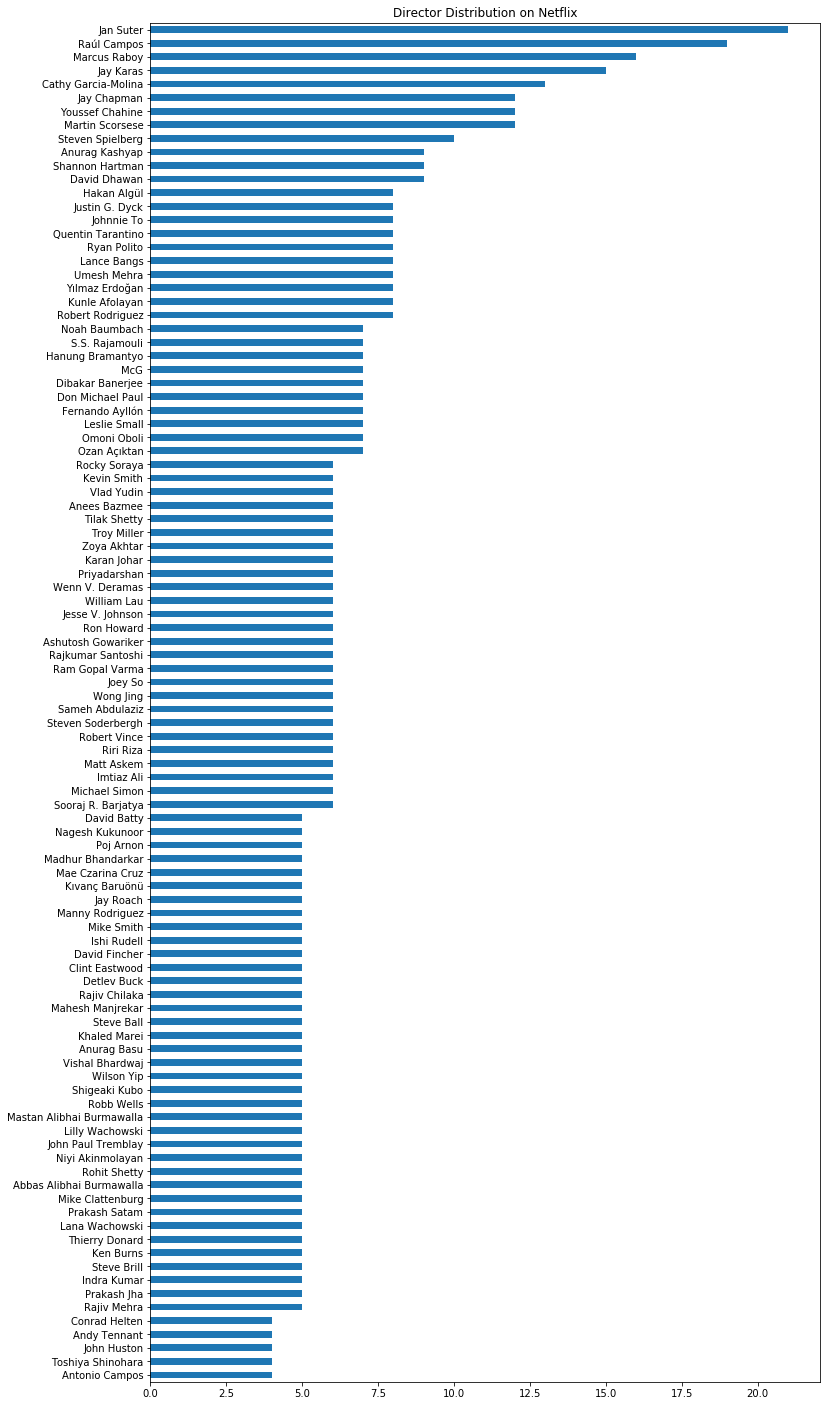

In [42]:
plot_freq_dist(netflix, 'director_list', 'director', 100, drop_unknown=True)

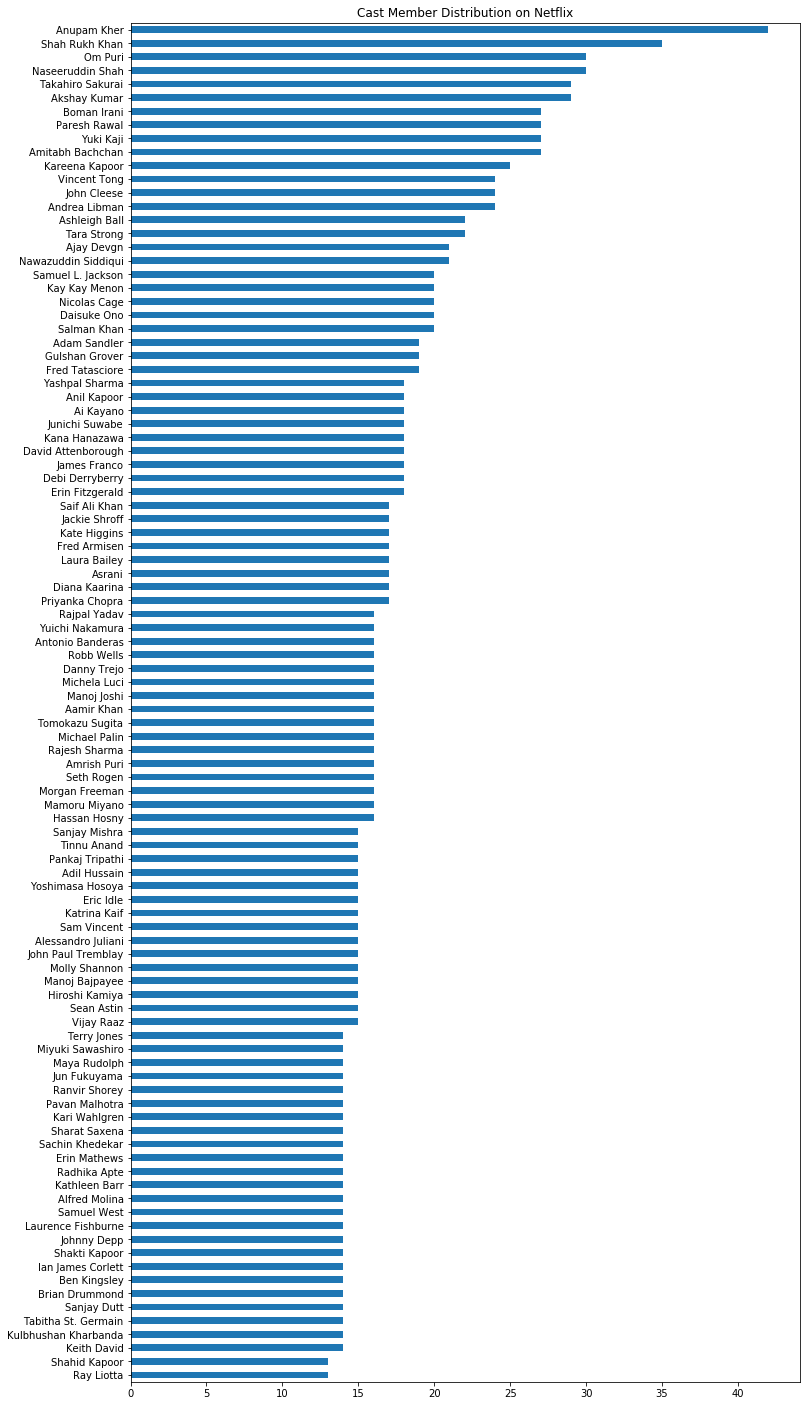

In [43]:
plot_freq_dist(netflix, 'cast_list', 'cast member', 100, drop_unknown=True)

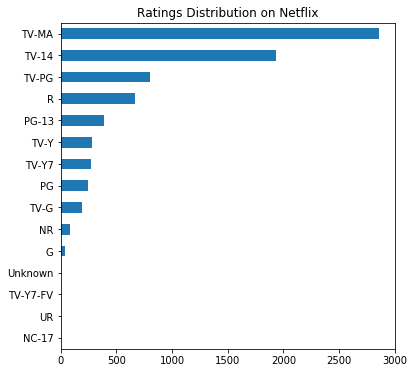

In [44]:
netflix.rating.value_counts(ascending=True).plot.barh(figsize=(6,6), title='Ratings Distribution on Netflix')

## Analysis: Deep Dive

### 6. Length of cast by country.

In [45]:
netflix[['country','cast_size']]

,country,cast_size
show_id,,
s1,Brazil,11
s2,Mexico,6
s3,Singapore,9
s4,United States,9
s5,United States,12
...,...,...
s7783,"Sweden, Czech Republic, United Kingdom, Denmar...",7
s7784,India,8
s7785,Unknown,1


In [46]:
countries_list = []
for entry in list(netflix.country_list):
    for x in entry:
        if x not in countries_list:
            countries_list.append(x)

countries_list

['Brazil',
 'Mexico',
 'Singapore',
 'United States',
 'Turkey',
 'Egypt',
 'India',
 'Poland',
 'Thailand',
 'Nigeria',
 'Unknown',
 'Norway',
 'Iceland',
 'United Kingdom',
 'Japan',
 'South Korea',
 'Italy',
 'Canada',
 'Indonesia',
 'Romania',
 'Spain',
 'South Africa',
 'France',
 'Portugal',
 'Hong Kong',
 'China',
 'Germany',
 'Argentina',
 'Serbia',
 'Denmark',
 'Kenya',
 'New Zealand',
 'Pakistan',
 'Australia',
 'Taiwan',
 'Netherlands',
 'Philippines',
 'United Arab Emirates',
 'Iran',
 'Belgium',
 'Israel',
 'Uruguay',
 'Bulgaria',
 'Chile',
 'Russia',
 'Mauritius',
 'Lebanon',
 'Colombia',
 'Algeria',
 'Soviet Union',
 'Sweden',
 'Malaysia',
 'Ireland',
 'Luxembourg',
 'Finland',
 'Austria',
 'Peru',
 'Senegal',
 'Switzerland',
 'Ghana',
 'Saudi Arabia',
 'Armenia',
 'Jordan',
 'Mongolia',
 'Namibia',
 'Qatar',
 'Vietnam',
 'Syria',
 'Kuwait',
 'Malta',
 'Czech Republic',
 'Bahamas',
 'Sri Lanka',
 'Cayman Islands',
 'Bangladesh',
 '',
 'Zimbabwe',
 'Hungary',
 'Latvia',
 

In [47]:
cast_sizes_by_country = {}
for c in countries_list:
    subset_df = netflix[netflix.country.str.contains(c)]
    avg_cast_size = subset_df.cast_size.mean()
    cast_sizes_by_country[c] = avg_cast_size

cast_sizes_by_country

{'Brazil': 7.136363636363637,
 'Mexico': 8.558441558441558,
 'Singapore': 6.871794871794871,
 'United States': 7.293600242644828,
 'Turkey': 8.777777777777779,
 'Egypt': 7.627272727272727,
 'India': 7.447474747474748,
 'Poland': 8.583333333333334,
 'Thailand': 8.184615384615384,
 'Nigeria': 8.68421052631579,
 'Unknown': 5.378698224852071,
 'Norway': 8.206896551724139,
 'Iceland': 7.111111111111111,
 'United Kingdom': 6.542185338865837,
 'Japan': 10.825783972125436,
 'South Korea': 7.702830188679245,
 'Italy': 6.7,
 'Canada': 7.856796116504855,
 'Indonesia': 7.8625,
 'Romania': 7.583333333333333,
 'Spain': 8.316279069767441,
 'South Africa': 7.851851851851852,
 'France': 7.868194842406877,
 'Portugal': 8.0,
 'Hong Kong': 7.764705882352941,
 'China': 7.809523809523809,
 'Germany': 7.75,
 'Argentina': 6.609756097560975,
 'Serbia': 7.714285714285714,
 'Denmark': 7.931818181818182,
 'Kenya': 8.6,
 'New Zealand': 7.285714285714286,
 'Pakistan': 7.583333333333333,
 'Australia': 7.368055555555

In [48]:
country_data = pd.DataFrame(pd.Series(cast_sizes_by_country), columns=['avg_cast_size'])
country_data

,avg_cast_size
Brazil,7.136364
Mexico,8.558442
Singapore,6.871795
United States,7.293600
Turkey,8.777778
...,...
Sudan,10.000000
Panama,1.000000
Uganda,1.000000
East Germany,10.000000


In [49]:
country_data.sort_values(by='avg_cast_size', ascending=False)

,avg_cast_size
Paraguay,13.0
Lithuania,13.0
Syria,12.0
Azerbaijan,11.0
Latvia,11.0
...,...
Nicaragua,1.0
Panama,1.0
Uganda,1.0
Sri Lanka,1.0


### 7. Proportion of shows vs movies by country.

In [50]:
country_data.head()

,avg_cast_size
Brazil,7.136364
Mexico,8.558442
Singapore,6.871795
United States,7.293600
Turkey,8.777778


In [51]:
netflix.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,director_list,cast_list,country_list,listed_in_list,director_size,cast_size,country_size,listed_in_size
show_id,,,,,,,,,,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,[Unknown],"[João Miguel, Bianca Comparato, Michel Gomes, ...",[Brazil],"[International TV Shows, TV Dramas, TV Sci-Fi ...",1,11,1,3
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,[Jorge Michel Grau],"[Demián Bichir, Héctor Bonilla, Oscar Serrano,...",[Mexico],"[Dramas, International Movies]",1,6,1,2
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,[Gilbert Chan],"[Tedd Chan, Stella Chung, Henley Hii, Lawrence...",[Singapore],"[Horror Movies, International Movies]",1,9,1,2


In [52]:
tv_shows_by_country = {}
movies_by_country = {}
for c in countries_list:
    subset_df = netflix[netflix.country.str.contains(c)]
    tv_show_count = len(subset_df[subset_df.type == 'TV Show'])
    movie_count = len(subset_df[subset_df.type == 'Movie'])
    tv_shows_by_country[c] = tv_show_count
    movies_by_country[c] = movie_count

tv_shows_by_country

{'Brazil': 29,
 'Mexico': 53,
 'Singapore': 21,
 'United States': 866,
 'Turkey': 28,
 'Egypt': 13,
 'India': 75,
 'Poland': 8,
 'Thailand': 22,
 'Nigeria': 8,
 'Unknown': 277,
 'Norway': 9,
 'Iceland': 2,
 'United Kingdom': 256,
 'Japan': 184,
 'South Korea': 157,
 'Italy': 23,
 'Canada': 126,
 'Indonesia': 3,
 'Romania': 0,
 'Spain': 57,
 'South Africa': 10,
 'France': 84,
 'Portugal': 0,
 'Hong Kong': 5,
 'China': 45,
 'Germany': 44,
 'Argentina': 18,
 'Serbia': 0,
 'Denmark': 13,
 'Kenya': 0,
 'New Zealand': 8,
 'Pakistan': 4,
 'Australia': 60,
 'Taiwan': 70,
 'Netherlands': 8,
 'Philippines': 1,
 'United Arab Emirates': 1,
 'Iran': 0,
 'Belgium': 11,
 'Israel': 8,
 'Uruguay': 1,
 'Bulgaria': 0,
 'Chile': 5,
 'Russia': 17,
 'Mauritius': 1,
 'Lebanon': 7,
 'Colombia': 28,
 'Algeria': 0,
 'Soviet Union': 0,
 'Sweden': 10,
 'Malaysia': 8,
 'Ireland': 12,
 'Luxembourg': 1,
 'Finland': 4,
 'Austria': 1,
 'Peru': 0,
 'Senegal': 1,
 'Switzerland': 1,
 'Ghana': 0,
 'Saudi Arabia': 4,
 'Arm

In [53]:
country_data['tv_count'] = country_data.index.map(tv_shows_by_country)
country_data['movie_count'] = country_data.index.map(movies_by_country)
country_data.head()

,avg_cast_size,tv_count,movie_count
Brazil,7.136364,29,59
Mexico,8.558442,53,101
Singapore,6.871795,21,18
United States,7.293600,866,2431
Turkey,8.777778,28,80


In [54]:
country_data['tv_percent'] = country_data.tv_count / (country_data.tv_count + country_data.movie_count) * 100
country_data['movie_percent'] = country_data.movie_count / (country_data.tv_count + country_data.movie_count) * 100
country_data.head()

,avg_cast_size,tv_count,movie_count,tv_percent,movie_percent
Brazil,7.136364,29,59,32.954545,67.045455
Mexico,8.558442,53,101,34.415584,65.584416
Singapore,6.871795,21,18,53.846154,46.153846
United States,7.293600,866,2431,26.266303,73.733697
Turkey,8.777778,28,80,25.925926,74.074074


### 8. Range of directors and cast members in terms of number of countries.

In [55]:
directors_list = []
for entry in list(netflix.director_list):
    for x in entry:
        if x not in directors_list:
            directors_list.append(x)

directors_list

['Unknown',
 'Jorge Michel Grau',
 'Gilbert Chan',
 'Shane Acker',
 'Robert Luketic',
 'Serdar Akar',
 'Yasir Al Yasiri',
 'Kevin Reynolds',
 'Shravan Kumar',
 'Vikram Bhatt',
 'Zak Hilditch',
 'Diego Enrique Osorno',
 'Nottapon Boonprakob',
 'John Suits',
 'Kunle Afolayan',
 'Paul Greengrass',
 'Swapnaneel Jayakar',
 'Onir',
 'Vijay Milton',
 'Santwana Bardoloi',
 'Atanu Ghosh',
 'Lyric R. Cabral',
 'David Felix Sutcliffe',
 'Cho Il',
 'Sabina Fedeli',
 'Anna Migotto',
 'Michael Margolis',
 'Rako Prijanto',
 'Fernando Lebrija',
 'Michael Kennedy',
 'Robert McCullough Jr.',
 'Cristina Jacob',
 'Frank Ariza',
 'Muharrem Gülmez',
 'Óskar Thór Axelsson',
 'Ozan Açıktan',
 'Kenneth Gyang',
 'Karyn Kusama',
 'Adam Deyoe',
 'Leif Tilden',
 'Adze Ugah',
 'Nicolas Brossette',
 'Roland Emmerich',
 'Marcel Barrena',
 'Melinda Janko',
 'Jastis Arimba',
 'Shrihari Sathe',
 'Sam Upton',
 'Victor Zarcoff',
 'Daniel Stamm',
 'Ava DuVernay',
 'Daniel Lee',
 'Scott Hussion',
 'Seth Fuller',
 'Adam Davi

In [56]:
# cast_members_list = []
# for entry in list(netflix.cast_list):
#     for x in entry:
#         if x not in cast_members_list:
#             cast_members_list.append(x)

# cast_members_list

In [57]:
country_count_by_director = {}
for d in directors_list:
    subset_df = netflix[netflix.director.str.contains(d)]
    country_count = {}
    for entry in subset_df.country.unique():
        for x in entry:
            if x not in country_count:
                country_count[x] = 1
            else:
                country_count[x] += 1
    
    country_count_by_director[d] = len(country_count)

country_count_by_director

{'Unknown': 47,
 'Jorge Michel Grau': 6,
 'Gilbert Chan': 9,
 'Shane Acker': 10,
 'Robert Luketic': 15,
 'Serdar Akar': 6,
 'Yasir Al Yasiri': 5,
 'Kevin Reynolds': 10,
 'Shravan Kumar': 5,
 'Vikram Bhatt': 5,
 'Zak Hilditch': 10,
 'Diego Enrique Osorno': 6,
 'Nottapon Boonprakob': 7,
 'John Suits': 10,
 'Kunle Afolayan': 11,
 'Paul Greengrass': 19,
 'Swapnaneel Jayakar': 5,
 'Onir': 9,
 'Vijay Milton': 5,
 'Santwana Bardoloi': 5,
 'Atanu Ghosh': 5,
 'Lyric R. Cabral': 10,
 'David Felix Sutcliffe': 10,
 'Cho Il': 10,
 'Sabina Fedeli': 5,
 'Anna Migotto': 5,
 'Michael Margolis': 4,
 'Rako Prijanto': 15,
 'Fernando Lebrija': 10,
 'Michael Kennedy': 4,
 'Robert McCullough Jr.': 10,
 'Cristina Jacob': 6,
 'Frank Ariza': 5,
 'Muharrem Gülmez': 6,
 'Óskar Thór Axelsson': 7,
 'Ozan Açıktan': 10,
 'Kenneth Gyang': 6,
 'Karyn Kusama': 12,
 'Adam Deyoe': 10,
 'Leif Tilden': 10,
 'Adze Ugah': 16,
 'Nicolas Brossette': 6,
 'Roland Emmerich': 18,
 'Marcel Barrena': 14,
 'Melinda Janko': 10,
 'Jasti

In [58]:
# country_count_by_cast_member = {}
# for c in cast_members_list:
#     subset_df = netflix[netflix.cast.str.contains(c)]
#     country_count = {}
#     for entry in subset_df.country.unique():
#         for x in entry:
#             if x not in country_count:
#                 country_count[x] = 1
#             else:
#                 country_count[x] += 1
    
#     country_count_by_cast_member[c] = len(country_count)

# country_count_by_cast_member

In [59]:
pd.Series(country_count_by_director).sort_values(ascending=False)[1:11]

Martin Campbell       31
Matthew Salleh        30
Josef Fares           29
James Watkins         28
Andrzej Bartkowiak    27
Philippe Aractingi    27
Joshua Oppenheimer    27
Ari Folman            27
Brian De Palma        27
Terry Gilliam         26
dtype: int64

In [60]:
# pd.Series(country_count_by_cast_member).sort_values(ascending=False)[:10]

### 9. Deeper dive into movies separately.

In [61]:
movies.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,director_list,cast_list,country_list,listed_in_list,director_size,cast_size,country_size,listed_in_size
show_id,,,,,,,,,,,,,,,,,,,,
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,[Jorge Michel Grau],"[Demián Bichir, Héctor Bonilla, Oscar Serrano,...",[Mexico],"[Dramas, International Movies]",1,6,1,2
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,[Gilbert Chan],"[Tedd Chan, Stella Chung, Henley Hii, Lawrence...",[Singapore],"[Horror Movies, International Movies]",1,9,1,2


In [62]:
movies[movies.duration < 10]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,director_list,cast_list,country_list,listed_in_list,director_size,cast_size,country_size,listed_in_size
show_id,,,,,,,,,,,,,,,,,,,,
s1204,Movie,Canvas,Frank E. Abney III,Unknown,United States,2020-12-11,2020,G,9,"Children & Family Movies, Dramas","After a heartbreaking loss, a grandfather stru...",2020.0,[Frank E. Abney III],[Unknown],[United States],"[Children & Family Movies, Dramas]",1,1,1,2
s1502,Movie,Cops and Robbers,"Arnon Manor, Timothy Ware-Hill",Timothy Ware-Hill,United States,2020-12-28,2020,PG-13,8,Dramas,Animation and activism unite in this multimedi...,2020.0,"[Arnon Manor, Timothy Ware-Hill]",[Timothy Ware-Hill],[United States],[Dramas],2,1,1,1
s5606,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",Unknown,United States,2019-06-04,2014,TV-Y,3,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",2019.0,"[Limbert Fabian, Brandon Oldenburg]",[Unknown],[United States],"[Children & Family Movies, Sci-Fi & Fantasy]",2,1,1,2
s5695,Movie,Sol Levante,Akira Saitoh,Unknown,Japan,2020-04-02,2020,TV-14,5,"Action & Adventure, Anime Features, Internatio...",A young warrior and her familiar search for th...,2020.0,[Akira Saitoh],[Unknown],[Japan],"[Action & Adventure, Anime Features, Internati...",1,1,1,3


In [63]:
movies[movies.duration > 240]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,director_list,cast_list,country_list,listed_in_list,director_size,cast_size,country_size,listed_in_size
show_id,,,,,,,,,,,,,,,,,,,,
s958,Movie,Black Mirror: Bandersnatch,Unknown,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018.0,[Unknown],"[Fionn Whitehead, Will Poulter, Craig Parkinso...",[United States],"[Dramas, International Movies, Sci-Fi & Fantasy]",1,5,1,3
s6851,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,2020-05-21,1973,TV-14,253,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...,2020.0,[Houssam El-Din Mustafa],"[Suhair El-Babili, Adel Emam, Saeed Saleh, You...",[Egypt],"[Comedies, Dramas, International Movies]",1,7,1,3


In [64]:
genres_list = []
for entry in list(netflix.listed_in_list):
    for x in entry:
        if x not in genres_list:
            genres_list.append(x)

genres_list

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies',
 'Horror Movies',
 'Action & Adventure',
 'Independent Movies',
 'Sci-Fi & Fantasy',
 'TV Mysteries',
 'Thrillers',
 'Crime TV Shows',
 'Docuseries',
 'Documentaries',
 'Sports Movies',
 'Comedies',
 'Anime Series',
 'Reality TV',
 'TV Comedies',
 'Romantic Movies',
 'Romantic TV Shows',
 'Science & Nature TV',
 'Movies',
 'British TV Shows',
 'Korean TV Shows',
 'Music & Musicals',
 'LGBTQ Movies',
 'Faith & Spirituality',
 "Kids' TV",
 'TV Action & Adventure',
 'Spanish-Language TV Shows',
 'Children & Family Movies',
 'TV Shows',
 'Classic Movies',
 'Cult Movies',
 'TV Horror',
 'Stand-Up Comedy & Talk Shows',
 'Teen TV Shows',
 'Stand-Up Comedy',
 'Anime Features',
 'TV Thrillers',
 'Classic & Cult TV']

In [65]:
count_by_genre_movie = {}
avg_duration_by_genre = {}
for g in genres_list:
    subset_df = movies[movies.listed_in.str.contains(g)]
    count = len(subset_df)
    avg_duration = subset_df.duration.mean()
    count_by_genre_movie[g] = count
    avg_duration_by_genre[g] = avg_duration

genre_duration = pd.DataFrame(pd.Series(avg_duration_by_genre), columns=['avg_duration'])
genre_duration['movie_count'] = genre_duration.index.map(count_by_genre_movie)
genre_duration.dropna(inplace=True)
genre_duration.sort_values(by='avg_duration', inplace=True)
genre_duration

,avg_duration,movie_count
Stand-Up Comedy,67.060790,329
Children & Family Movies,79.716165,532
Documentaries,81.376590,786
Anime Features,91.210526,57
LGBTQ Movies,93.966667,90
Sports Movies,95.367347,196
Horror Movies,97.544872,312
Independent Movies,100.754829,673
Movies,102.786894,3937
Comedies,104.551326,1471


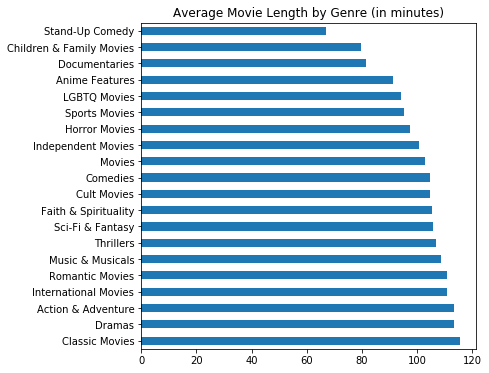

In [66]:
genre_duration.avg_duration.sort_values(ascending=False).plot.barh(figsize=(6,6), title='Average Movie Length by Genre (in minutes)')

In [67]:
avg_duration_by_country = {}
for c in countries_list:
    subset_df = movies[movies.country.str.contains(c)]
    avg_duration = subset_df.duration.mean()
    avg_duration_by_country[c] = avg_duration

country_duration = pd.DataFrame(pd.Series(avg_duration_by_country), columns=['avg_duration'])
country_duration['movie_count'] = country_duration.index.map(movies_by_country)
country_duration.dropna(inplace=True)
country_duration.sort_values(by='avg_duration', inplace=True)
country_duration

,avg_duration,movie_count
Kazakhstan,67.000000,1
Guatemala,68.000000,2
Uganda,68.000000,1
Namibia,69.500000,2
Georgia,71.500000,2
...,...,...
Morocco,137.333333,6
Bahamas,145.000000,1
Soviet Union,156.666667,3
Montenegro,157.000000,1


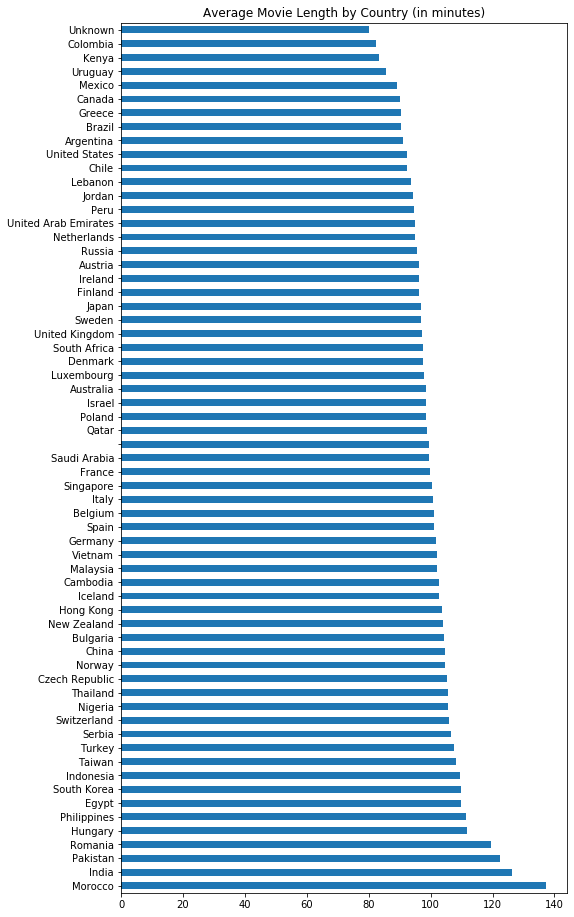

In [68]:
country_duration[country_duration.movie_count >= 5].avg_duration.sort_values(ascending=False).plot.barh(
    figsize=(8,16), title='Average Movie Length by Country (in minutes)')

### 10. Deeper dive into TV shows separately.

In [69]:
tv_shows.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,director_list,cast_list,country_list,listed_in_list,director_size,cast_size,country_size,listed_in_size
show_id,,,,,,,,,,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,[Unknown],"[João Miguel, Bianca Comparato, Michel Gomes, ...",[Brazil],"[International TV Shows, TV Dramas, TV Sci-Fi ...",1,11,1,3
s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017.0,[Serdar Akar],"[Erdal Beşikçioğlu, Yasemin Allen, Melis Birka...",[Turkey],"[International TV Shows, TV Dramas, TV Mysteries]",1,10,1,3


In [70]:
tv_shows.duration.value_counts()

1 Season      1608
2 Seasons      382
3 Seasons      184
4 Seasons       87
5 Seasons       58
6 Seasons       30
7 Seasons       19
8 Seasons       18
9 Seasons        8
10 Seasons       6
11 Seasons       3
13 Seasons       2
12 Seasons       2
15 Seasons       2
16 Seasons       1
Name: duration, dtype: int64

In [71]:
tv_shows[tv_shows.duration == '16 Seasons']

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,director_list,cast_list,country_list,listed_in_list,director_size,cast_size,country_size,listed_in_size
show_id,,,,,,,,,,,,,,,,,,,,
s2539,TV Show,Grey's Anatomy,Unknown,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2020-05-09,2019,TV-14,16 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,2020.0,[Unknown],"[Ellen Pompeo, Sandra Oh, Katherine Heigl, Jus...",[United States],"[Romantic TV Shows, TV Dramas]",1,15,1,2


In [72]:
tv_shows.cast_size.sort_values(ascending=False).head(5)

show_id
s957     50
s5689    50
s2677    47
s1533    47
s1472    47
Name: cast_size, dtype: int64

In [73]:
count_by_genre_tv = {}
length_dist_by_genre = {}
for g in genres_list:
    subset_df = tv_shows[tv_shows.listed_in.str.contains(g)]
    count = len(subset_df)
    length_dist = dict(subset_df.duration.value_counts())
    count_by_genre_tv[g] = count
    length_dist_by_genre[g] = length_dist

tv_genre_season = pd.DataFrame.from_dict(length_dist_by_genre, orient='index')
tv_genre_season_cols = [
    '1 Season',
    '2 Seasons',
    '3 Seasons',
    '4 Seasons',
    '5 Seasons',
    '6 Seasons',
    '7 Seasons',
    '8 Seasons',
    '9 Seasons',
    '10 Seasons',
    '11 Seasons',
    '12 Seasons',
    '13 Seasons',
    '15 Seasons',
    '16 Seasons',
]
tv_genre_season = tv_genre_season.reindex(columns=tv_genre_season_cols)
tv_genre_season['total'] = tv_genre_season.index.map(count_by_genre_tv)
tv_genre_season.fillna(0, inplace=True)
tv_genre_season = tv_genre_season.astype('int')
tv_genre_season.sort_values(by='total', ascending=False, inplace=True)
tv_genre_season

,1 Season,2 Seasons,3 Seasons,4 Seasons,5 Seasons,6 Seasons,7 Seasons,8 Seasons,9 Seasons,10 Seasons,11 Seasons,12 Seasons,13 Seasons,15 Seasons,16 Seasons,total
TV Shows,1146,224,99,41,24,13,8,6,5,2,0,2,0,1,1,1572
International TV Shows,940,151,60,23,13,2,4,2,3,0,0,1,0,0,0,1199
Dramas,489,81,53,24,20,12,11,6,3,1,1,1,0,1,1,704
TV Dramas,489,81,53,24,20,12,11,6,3,1,1,1,0,1,1,704
TV Comedies,291,99,48,29,19,13,7,9,2,4,2,0,2,0,0,525
Comedies,291,99,48,29,19,13,7,9,2,4,2,0,2,0,0,525
Crime TV Shows,295,62,33,9,12,5,3,4,1,0,0,2,0,1,0,427
Kids' TV,205,118,44,27,10,4,0,4,0,2,0,0,0,0,0,414
Docuseries,292,28,20,5,4,2,0,1,1,0,0,0,0,0,0,353
Romantic TV Shows,280,23,13,7,1,3,3,1,1,0,0,0,0,0,1,333


In [74]:
four_plus_seasons = [
    '4 Seasons',
    '5 Seasons',
    '6 Seasons',
    '7 Seasons',
    '8 Seasons',
    '9 Seasons',
    '10 Seasons',
    '11 Seasons',
    '12 Seasons',
    '13 Seasons',
    '15 Seasons',
    '16 Seasons',
]
over_four_season_sum = tv_genre_season[four_plus_seasons].sum(axis=1)
tv_genre_season_pct = tv_genre_season[['1 Season','2 Seasons','3 Seasons']].copy()
tv_genre_season_pct['4+ Seasons'] = over_four_season_sum
tv_genre_season_pct['total'] = tv_genre_season.total
tv_genre_season_pct

,1 Season,2 Seasons,3 Seasons,4+ Seasons,total
TV Shows,1146,224,99,103,1572
International TV Shows,940,151,60,48,1199
Dramas,489,81,53,81,704
TV Dramas,489,81,53,81,704
TV Comedies,291,99,48,87,525
Comedies,291,99,48,87,525
Crime TV Shows,295,62,33,37,427
Kids' TV,205,118,44,47,414
Docuseries,292,28,20,13,353
Romantic TV Shows,280,23,13,17,333


In [75]:
tgsp_norm_cols = tv_genre_season_pct.columns.tolist()
tgsp_norm_cols.remove('total')
tgsp_norm_cols
for col in tgsp_norm_cols:
    tv_genre_season_pct['{}_pct'.format(col)] = tv_genre_season_pct[col] / tv_genre_season_pct.total * 100

tv_genre_season_pct = tv_genre_season_pct.reindex(columns=[
    '1 Season',
    '1 Season_pct',
    '2 Seasons',
    '2 Seasons_pct',
    '3 Seasons',
    '3 Seasons_pct',
    '4+ Seasons',
    '4+ Seasons_pct',
    'total'
])
tv_genre_season_pct

,1 Season,1 Season_pct,2 Seasons,2 Seasons_pct,3 Seasons,3 Seasons_pct,4+ Seasons,4+ Seasons_pct,total
TV Shows,1146,72.900763,224,14.249364,99,6.297710,103,6.552163,1572
International TV Shows,940,78.398666,151,12.593828,60,5.004170,48,4.003336,1199
Dramas,489,69.460227,81,11.505682,53,7.528409,81,11.505682,704
TV Dramas,489,69.460227,81,11.505682,53,7.528409,81,11.505682,704
TV Comedies,291,55.428571,99,18.857143,48,9.142857,87,16.571429,525
Comedies,291,55.428571,99,18.857143,48,9.142857,87,16.571429,525
Crime TV Shows,295,69.086651,62,14.519906,33,7.728337,37,8.665105,427
Kids' TV,205,49.516908,118,28.502415,44,10.628019,47,11.352657,414
Docuseries,292,82.719547,28,7.932011,20,5.665722,13,3.682720,353
Romantic TV Shows,280,84.084084,23,6.906907,13,3.903904,17,5.105105,333


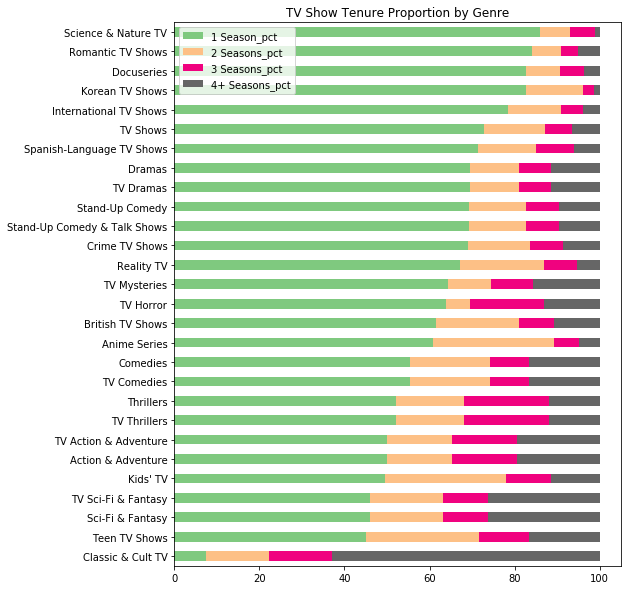

In [76]:
stacked_bar_cols = ['1 Season_pct','2 Seasons_pct','3 Seasons_pct','4+ Seasons_pct']
tv_genre_season_pct[stacked_bar_cols].sort_values(by='1 Season_pct').plot.barh(
    stacked=True, figsize=(8,10), cmap='Accent', title='TV Show Tenure Proportion by Genre')

### 11. Deeper dive into specific regions (e.g. Africa).

See Netflix_Region_Comparison notebook.

### 12. Profiles with similar data, outliers across multiple categories, big budget vs small budget.

## Analysis: Natural Language Processing

### 13. Most common words in descriptions overall and by category (i.e. rating, genre).

In [77]:
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [78]:
# nltk.download('wordnet')

In [79]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/antiri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [80]:
descr_first_five = list(netflix.description.head())
descr_first_five

['In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.',
 'After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.',
 "When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",
 'In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group.',
 'A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.']

In [81]:
first_five_tokenized = []
for d in descr_first_five:
    tokenized_list = word_tokenize(d)
    first_five_tokenized = first_five_tokenized + tokenized_list
first_five_tokenized

['In',
 'a',
 'future',
 'where',
 'the',
 'elite',
 'inhabit',
 'an',
 'island',
 'paradise',
 'far',
 'from',
 'the',
 'crowded',
 'slums',
 ',',
 'you',
 'get',
 'one',
 'chance',
 'to',
 'join',
 'the',
 '3',
 '%',
 'saved',
 'from',
 'squalor',
 '.',
 'After',
 'a',
 'devastating',
 'earthquake',
 'hits',
 'Mexico',
 'City',
 ',',
 'trapped',
 'survivors',
 'from',
 'all',
 'walks',
 'of',
 'life',
 'wait',
 'to',
 'be',
 'rescued',
 'while',
 'trying',
 'desperately',
 'to',
 'stay',
 'alive',
 '.',
 'When',
 'an',
 'army',
 'recruit',
 'is',
 'found',
 'dead',
 ',',
 'his',
 'fellow',
 'soldiers',
 'are',
 'forced',
 'to',
 'confront',
 'a',
 'terrifying',
 'secret',
 'that',
 "'s",
 'haunting',
 'their',
 'jungle',
 'island',
 'training',
 'camp',
 '.',
 'In',
 'a',
 'postapocalyptic',
 'world',
 ',',
 'rag-doll',
 'robots',
 'hide',
 'in',
 'fear',
 'from',
 'dangerous',
 'machines',
 'out',
 'to',
 'exterminate',
 'them',
 ',',
 'until',
 'a',
 'brave',
 'newcomer',
 'joins',

In [82]:
freq_dist = FreqDist(first_five_tokenized)
freq_dist

FreqDist({'a': 5, 'the': 5, ',': 5, 'to': 5, '.': 5, 'from': 4, 'of': 4, 'In': 2, 'an': 2, 'island': 2, ...})

In [83]:
freq_dist.most_common(20)

[('a', 5),
 ('the', 5),
 (',', 5),
 ('to', 5),
 ('.', 5),
 ('from', 4),
 ('of', 4),
 ('In', 2),
 ('an', 2),
 ('island', 2),
 ('out', 2),
 ('group', 2),
 ('future', 1),
 ('where', 1),
 ('elite', 1),
 ('inhabit', 1),
 ('paradise', 1),
 ('far', 1),
 ('crowded', 1),
 ('slums', 1)]

In [109]:
pip install stop-words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32916 sha256=6020295156fea4d61dedce8704f462472bf7e3de51a58bbbc35357e1ba2c2c55
  Stored in directory: /home/antiri/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words
Note: you may need to restart the kernel to use updated packages.


In [111]:
from stop_words import get_stop_words
s_words = get_stop_words('english')
s_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 "let's",
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'same',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "s

In [84]:
count_vec = CountVectorizer()
count_vec.fit(descr_first_five)
count_vec.vocabulary_

{'in': 42,
 'future': 35,
 'where': 89,
 'the': 77,
 'elite': 26,
 'inhabit': 43,
 'an': 3,
 'island': 46,
 'paradise': 59,
 'far': 29,
 'from': 34,
 'crowded': 19,
 'slums': 68,
 'you': 93,
 'get': 36,
 'one': 57,
 'chance': 15,
 'to': 80,
 'join': 47,
 'saved': 66,
 'squalor': 70,
 'after': 0,
 'devastating': 23,
 'earthquake': 25,
 'hits': 41,
 'mexico': 53,
 'city': 16,
 'trapped': 82,
 'survivors': 73,
 'all': 2,
 'walks': 87,
 'of': 56,
 'life': 51,
 'wait': 86,
 'be': 6,
 'rescued': 64,
 'while': 90,
 'trying': 83,
 'desperately': 22,
 'stay': 71,
 'alive': 1,
 'when': 88,
 'army': 5,
 'recruit': 63,
 'is': 45,
 'found': 33,
 'dead': 21,
 'his': 40,
 'fellow': 31,
 'soldiers': 69,
 'are': 4,
 'forced': 32,
 'confront': 17,
 'terrifying': 75,
 'secret': 67,
 'that': 76,
 'haunting': 38,
 'their': 78,
 'jungle': 49,
 'training': 81,
 'camp': 12,
 'postapocalyptic': 61,
 'world': 92,
 'rag': 62,
 'doll': 24,
 'robots': 65,
 'hide': 39,
 'fear': 30,
 'dangerous': 20,
 'machines': 52

In [123]:
count_vec_terms = count_vec.fit_transform(descr_first_five)
print('(Doc, WordIndex): Count')
print(count_vec_terms)

(Doc, WordIndex): Count
  (0, 42)	1
  (0, 35)	1
  (0, 89)	1
  (0, 77)	3
  (0, 26)	1
  (0, 43)	1
  (0, 3)	1
  (0, 46)	1
  (0, 59)	1
  (0, 29)	1
  (0, 34)	2
  (0, 19)	1
  (0, 68)	1
  (0, 93)	1
  (0, 36)	1
  (0, 57)	1
  (0, 15)	1
  (0, 80)	1
  (0, 47)	1
  (0, 66)	1
  (0, 70)	1
  (1, 34)	1
  (1, 80)	2
  (1, 0)	1
  (1, 23)	1
  :	:
  (3, 84)	1
  (3, 9)	1
  (3, 55)	1
  (3, 48)	1
  (3, 37)	1
  (4, 77)	1
  (4, 56)	3
  (4, 58)	1
  (4, 37)	1
  (4, 10)	1
  (4, 72)	1
  (4, 7)	1
  (4, 13)	1
  (4, 18)	1
  (4, 27)	1
  (4, 91)	1
  (4, 44)	1
  (4, 74)	1
  (4, 54)	1
  (4, 50)	1
  (4, 85)	1
  (4, 14)	1
  (4, 11)	1
  (4, 60)	1
  (4, 8)	1


In [145]:
count_df = pd.DataFrame(count_vec_terms.toarray().T, index=count_vec.get_feature_names())
count_df['total'] = count_df.sum(axis=1)
count_df.sort_values(by='total', ascending=False)

,0,1,2,3,4,total
the,3,0,0,1,1,5
to,1,2,1,1,0,5
of,0,1,0,0,3,4
from,2,1,0,1,0,4
in,1,0,0,2,0,3
...,...,...,...,...,...,...
far,1,0,0,0,0,1
exterminate,0,0,0,1,0,1
experts,0,0,0,0,1,1
elite,1,0,0,0,0,1


In [115]:
count_vec_remix = CountVectorizer(stop_words=s_words)
count_vec_remix.fit(descr_first_five)
count_vec_remix.vocabulary_

{'future': 28,
 'elite': 20,
 'inhabit': 34,
 'island': 36,
 'paradise': 47,
 'far': 23,
 'crowded': 13,
 'slums': 56,
 'get': 29,
 'one': 46,
 'chance': 9,
 'join': 37,
 'saved': 54,
 'squalor': 58,
 'devastating': 17,
 'earthquake': 19,
 'hits': 33,
 'mexico': 43,
 'city': 10,
 'trapped': 65,
 'survivors': 61,
 'walks': 69,
 'life': 41,
 'wait': 68,
 'rescued': 52,
 'trying': 66,
 'desperately': 16,
 'stay': 59,
 'alive': 0,
 'army': 1,
 'recruit': 51,
 'found': 27,
 'dead': 15,
 'fellow': 25,
 'soldiers': 57,
 'forced': 26,
 'confront': 11,
 'terrifying': 63,
 'secret': 55,
 'haunting': 31,
 'jungle': 39,
 'training': 64,
 'camp': 6,
 'postapocalyptic': 49,
 'world': 70,
 'rag': 50,
 'doll': 18,
 'robots': 53,
 'hide': 32,
 'fear': 24,
 'dangerous': 14,
 'machines': 42,
 'exterminate': 22,
 'brave': 4,
 'newcomer': 45,
 'joins': 38,
 'group': 30,
 'brilliant': 5,
 'students': 60,
 'become': 2,
 'card': 7,
 'counting': 12,
 'experts': 21,
 'intent': 35,
 'swindling': 62,
 'millions':

In [146]:
count_vec_remix_terms = count_vec_remix.fit_transform(descr_first_five)
count_df_remix = pd.DataFrame(count_vec_remix_terms.toarray().T, index=count_vec_remix.get_feature_names())
count_df_remix['total'] = count_df_remix.sum(axis=1)
count_df_remix.sort_values(by='total', ascending=False)

,0,1,2,3,4,total
group,0,0,0,1,1,2
island,1,0,1,0,0,2
alive,0,1,0,0,0,1
newcomer,0,0,0,1,0,1
recruit,0,0,1,0,0,1
...,...,...,...,...,...,...
get,1,0,0,0,0,1
haunting,0,0,1,0,0,1
hide,0,0,0,1,0,1
hits,0,1,0,0,0,1


In [147]:
def create_word_distribution(text_list, method, stop_words):
    vectorizer = method(stop_words=stop_words)
    text_terms = vectorizer.fit_transform(text_list)
    text_df = pd.DataFrame(text_terms.toarray().T, index=vectorizer.get_feature_names())
    text_df['total'] = text_df.sum(axis=1)
    text_df.sort_values(by='total', ascending=False, inplace=True)
    return text_df

In [149]:
create_word_distribution(list(netflix.loc[netflix.country == 'United States', 'description']), CountVectorizer, s_words)

/home/antiri/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,0,1,2,3,4,5,6,7,8,9,...,2546,2547,2548,2549,2550,2551,2552,2553,2554,total
life,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,267
new,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,256
world,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,164
documentary,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,155
family,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ignored,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ignorance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
idyllic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
idle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [86]:
def lowercase_doc(documents):
    documents_remix = []
    for d in documents:
        d_remix = d.lower()
        documents_remix.append(d_remix)
    return documents_remix

descr_first_five_low = lowercase_doc(descr_first_five)
descr_first_five_low

['in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.',
 'after a devastating earthquake hits mexico city, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.',
 "when an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",
 'in a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group.',
 'a brilliant group of students become card-counting experts with the intent of swindling millions out of las vegas casinos by playing blackjack.']

In [87]:
first_five_tokenized_low = []
for d in descr_first_five_low:
    tokenized_list_low = word_tokenize(d)
    first_five_tokenized_low = first_five_tokenized_low + tokenized_list_low
first_five_tokenized_low

['in',
 'a',
 'future',
 'where',
 'the',
 'elite',
 'inhabit',
 'an',
 'island',
 'paradise',
 'far',
 'from',
 'the',
 'crowded',
 'slums',
 ',',
 'you',
 'get',
 'one',
 'chance',
 'to',
 'join',
 'the',
 '3',
 '%',
 'saved',
 'from',
 'squalor',
 '.',
 'after',
 'a',
 'devastating',
 'earthquake',
 'hits',
 'mexico',
 'city',
 ',',
 'trapped',
 'survivors',
 'from',
 'all',
 'walks',
 'of',
 'life',
 'wait',
 'to',
 'be',
 'rescued',
 'while',
 'trying',
 'desperately',
 'to',
 'stay',
 'alive',
 '.',
 'when',
 'an',
 'army',
 'recruit',
 'is',
 'found',
 'dead',
 ',',
 'his',
 'fellow',
 'soldiers',
 'are',
 'forced',
 'to',
 'confront',
 'a',
 'terrifying',
 'secret',
 'that',
 "'s",
 'haunting',
 'their',
 'jungle',
 'island',
 'training',
 'camp',
 '.',
 'in',
 'a',
 'postapocalyptic',
 'world',
 ',',
 'rag-doll',
 'robots',
 'hide',
 'in',
 'fear',
 'from',
 'dangerous',
 'machines',
 'out',
 'to',
 'exterminate',
 'them',
 ',',
 'until',
 'a',
 'brave',
 'newcomer',
 'joins',

In [88]:
freq_dist_low = FreqDist(first_five_tokenized_low)
freq_dist_low.most_common(20)

[('a', 6),
 ('the', 5),
 (',', 5),
 ('to', 5),
 ('.', 5),
 ('from', 4),
 ('of', 4),
 ('in', 3),
 ('an', 2),
 ('island', 2),
 ('out', 2),
 ('group', 2),
 ('future', 1),
 ('where', 1),
 ('elite', 1),
 ('inhabit', 1),
 ('paradise', 1),
 ('far', 1),
 ('crowded', 1),
 ('slums', 1)]

In [89]:
import re
def strip_punctuation(documents):
    documents_remix = []
    for d in documents:
        d_remix = re.sub('[^\w\s]', '', d)
        if d_remix != '':
            documents_remix.append(d_remix)
    return documents_remix

descr_first_five_no_punc = strip_punctuation(descr_first_five_low)
descr_first_five_no_punc

['in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor',
 'after a devastating earthquake hits mexico city trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive',
 'when an army recruit is found dead his fellow soldiers are forced to confront a terrifying secret thats haunting their jungle island training camp',
 'in a postapocalyptic world ragdoll robots hide in fear from dangerous machines out to exterminate them until a brave newcomer joins the group',
 'a brilliant group of students become cardcounting experts with the intent of swindling millions out of las vegas casinos by playing blackjack']

In [90]:
first_five_tokenized_no_punc = []
for d in descr_first_five_no_punc:
    tokenized_list_no_punc = word_tokenize(d)
    first_five_tokenized_no_punc = first_five_tokenized_no_punc + tokenized_list_no_punc
first_five_tokenized_no_punc

['in',
 'a',
 'future',
 'where',
 'the',
 'elite',
 'inhabit',
 'an',
 'island',
 'paradise',
 'far',
 'from',
 'the',
 'crowded',
 'slums',
 'you',
 'get',
 'one',
 'chance',
 'to',
 'join',
 'the',
 '3',
 'saved',
 'from',
 'squalor',
 'after',
 'a',
 'devastating',
 'earthquake',
 'hits',
 'mexico',
 'city',
 'trapped',
 'survivors',
 'from',
 'all',
 'walks',
 'of',
 'life',
 'wait',
 'to',
 'be',
 'rescued',
 'while',
 'trying',
 'desperately',
 'to',
 'stay',
 'alive',
 'when',
 'an',
 'army',
 'recruit',
 'is',
 'found',
 'dead',
 'his',
 'fellow',
 'soldiers',
 'are',
 'forced',
 'to',
 'confront',
 'a',
 'terrifying',
 'secret',
 'thats',
 'haunting',
 'their',
 'jungle',
 'island',
 'training',
 'camp',
 'in',
 'a',
 'postapocalyptic',
 'world',
 'ragdoll',
 'robots',
 'hide',
 'in',
 'fear',
 'from',
 'dangerous',
 'machines',
 'out',
 'to',
 'exterminate',
 'them',
 'until',
 'a',
 'brave',
 'newcomer',
 'joins',
 'the',
 'group',
 'a',
 'brilliant',
 'group',
 'of',
 'stu

In [91]:
freq_dist_no_punc = FreqDist(first_five_tokenized_no_punc)
freq_dist_no_punc.most_common(20)

[('a', 6),
 ('the', 5),
 ('to', 5),
 ('from', 4),
 ('of', 4),
 ('in', 3),
 ('an', 2),
 ('island', 2),
 ('out', 2),
 ('group', 2),
 ('future', 1),
 ('where', 1),
 ('elite', 1),
 ('inhabit', 1),
 ('paradise', 1),
 ('far', 1),
 ('crowded', 1),
 ('slums', 1),
 ('you', 1),
 ('get', 1)]

In [93]:
pip install inflect

Note: you may need to restart the kernel to use updated packages.


In [98]:
import inflect
def convert_digits(documents):
    documents_remix = []
    inf_engine = inflect.engine()
    for d in documents:
        new_word_list = []
        words = d.split()
        for w in words:
            if w.isdigit():
                new_word_list.append(inf_engine.number_to_words(w))
            else:
                new_word_list.append(w)
        documents_remix.append(' '.join(new_word_list))
    return documents_remix

descr_first_five_no_digits = convert_digits(descr_first_five_no_punc)
descr_first_five_no_digits

['in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the three saved from squalor',
 'after a devastating earthquake hits mexico city trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive',
 'when an army recruit is found dead his fellow soldiers are forced to confront a terrifying secret thats haunting their jungle island training camp',
 'in a postapocalyptic world ragdoll robots hide in fear from dangerous machines out to exterminate them until a brave newcomer joins the group',
 'a brilliant group of students become cardcounting experts with the intent of swindling millions out of las vegas casinos by playing blackjack']

In [99]:
first_five_tokenized_no_digits = []
for d in descr_first_five_no_digits:
    tokenized_list_no_digits = word_tokenize(d)
    first_five_tokenized_no_digits = first_five_tokenized_no_digits + tokenized_list_no_digits
first_five_tokenized_no_digits

['in',
 'a',
 'future',
 'where',
 'the',
 'elite',
 'inhabit',
 'an',
 'island',
 'paradise',
 'far',
 'from',
 'the',
 'crowded',
 'slums',
 'you',
 'get',
 'one',
 'chance',
 'to',
 'join',
 'the',
 'three',
 'saved',
 'from',
 'squalor',
 'after',
 'a',
 'devastating',
 'earthquake',
 'hits',
 'mexico',
 'city',
 'trapped',
 'survivors',
 'from',
 'all',
 'walks',
 'of',
 'life',
 'wait',
 'to',
 'be',
 'rescued',
 'while',
 'trying',
 'desperately',
 'to',
 'stay',
 'alive',
 'when',
 'an',
 'army',
 'recruit',
 'is',
 'found',
 'dead',
 'his',
 'fellow',
 'soldiers',
 'are',
 'forced',
 'to',
 'confront',
 'a',
 'terrifying',
 'secret',
 'thats',
 'haunting',
 'their',
 'jungle',
 'island',
 'training',
 'camp',
 'in',
 'a',
 'postapocalyptic',
 'world',
 'ragdoll',
 'robots',
 'hide',
 'in',
 'fear',
 'from',
 'dangerous',
 'machines',
 'out',
 'to',
 'exterminate',
 'them',
 'until',
 'a',
 'brave',
 'newcomer',
 'joins',
 'the',
 'group',
 'a',
 'brilliant',
 'group',
 'of',
 

In [100]:
freq_dist_no_digits = FreqDist(first_five_tokenized_no_digits)
freq_dist_no_digits.most_common(20)

[('a', 6),
 ('the', 5),
 ('to', 5),
 ('from', 4),
 ('of', 4),
 ('in', 3),
 ('an', 2),
 ('island', 2),
 ('out', 2),
 ('group', 2),
 ('future', 1),
 ('where', 1),
 ('elite', 1),
 ('inhabit', 1),
 ('paradise', 1),
 ('far', 1),
 ('crowded', 1),
 ('slums', 1),
 ('you', 1),
 ('get', 1)]

In [101]:
from nltk.stem import WordNetLemmatizer
def change_verbs_to_roots(documents):
    lemmatizer = WordNetLemmatizer()
    documents_remix = []
    for d in documents:
        new_word_list = []
        words = d.split()
        for w in words:
            new_word_list.append(lemmatizer.lemmatize(w, pos='v'))
        documents_remix.append(' '.join(new_word_list))
    return documents_remix

descr_first_five_lemmatized = change_verbs_to_roots(descr_first_five_no_digits)
descr_first_five_lemmatized

['in a future where the elite inhabit an island paradise far from the crowd slum you get one chance to join the three save from squalor',
 'after a devastate earthquake hit mexico city trap survivors from all walk of life wait to be rescue while try desperately to stay alive',
 'when an army recruit be find dead his fellow soldier be force to confront a terrify secret thats haunt their jungle island train camp',
 'in a postapocalyptic world ragdoll robots hide in fear from dangerous machine out to exterminate them until a brave newcomer join the group',
 'a brilliant group of students become cardcounting experts with the intent of swindle millions out of las vegas casinos by play blackjack']

In [102]:
first_five_tokenized_lemmatized = []
for d in descr_first_five_lemmatized:
    tokenized_list_lemmatized = word_tokenize(d)
    first_five_tokenized_lemmatized = first_five_tokenized_lemmatized + tokenized_list_lemmatized
first_five_tokenized_lemmatized

['in',
 'a',
 'future',
 'where',
 'the',
 'elite',
 'inhabit',
 'an',
 'island',
 'paradise',
 'far',
 'from',
 'the',
 'crowd',
 'slum',
 'you',
 'get',
 'one',
 'chance',
 'to',
 'join',
 'the',
 'three',
 'save',
 'from',
 'squalor',
 'after',
 'a',
 'devastate',
 'earthquake',
 'hit',
 'mexico',
 'city',
 'trap',
 'survivors',
 'from',
 'all',
 'walk',
 'of',
 'life',
 'wait',
 'to',
 'be',
 'rescue',
 'while',
 'try',
 'desperately',
 'to',
 'stay',
 'alive',
 'when',
 'an',
 'army',
 'recruit',
 'be',
 'find',
 'dead',
 'his',
 'fellow',
 'soldier',
 'be',
 'force',
 'to',
 'confront',
 'a',
 'terrify',
 'secret',
 'thats',
 'haunt',
 'their',
 'jungle',
 'island',
 'train',
 'camp',
 'in',
 'a',
 'postapocalyptic',
 'world',
 'ragdoll',
 'robots',
 'hide',
 'in',
 'fear',
 'from',
 'dangerous',
 'machine',
 'out',
 'to',
 'exterminate',
 'them',
 'until',
 'a',
 'brave',
 'newcomer',
 'join',
 'the',
 'group',
 'a',
 'brilliant',
 'group',
 'of',
 'students',
 'become',
 'cardc

In [103]:
freq_dist_lemmatized = FreqDist(first_five_tokenized_lemmatized)
freq_dist_lemmatized.most_common(20)

[('a', 6),
 ('the', 5),
 ('to', 5),
 ('from', 4),
 ('of', 4),
 ('in', 3),
 ('be', 3),
 ('an', 2),
 ('island', 2),
 ('join', 2),
 ('out', 2),
 ('group', 2),
 ('future', 1),
 ('where', 1),
 ('elite', 1),
 ('inhabit', 1),
 ('paradise', 1),
 ('far', 1),
 ('crowd', 1),
 ('slum', 1)]

In [ ]:
def normalize(documents):
    documents = lowercase_doc(documents)
    documents = strip_punctuation(documents)
    documents = convert_digits(documents)
    documents = change_verbs_to_roots(documents)
    return documents

In [ ]:
# count_vec = CountVectorizer()
# count_vec.fit_transform(netflix.description)
# count_vec.vocabulary_

In [ ]:
# tfidf_vec = TfidfVectorizer()
# tfidf = tfidf_vec.fit_transform(netflix[netflix.country == 'United States'].description)
# print(tfidf)
# # us_descr_words = pd.DataFrame(pd.Series(tfidf_vec.vocabulary_), columns=['frequency'])
# # us_descr_words

In [ ]:
# us_descr_words = tfidf_vec.get_feature_names()
# us_descr_words

In [ ]:
# us_descr_words.sort_values(by='frequency', ascending=False).head(20)